In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


filepath_orchid = 'C:/SandBox/Prosperity/second-round/data/prices_round_2_day_1.csv'
filepath_bots = 'C:/SandBox/Prosperity/second-round/daksh-work/botData.csv'

ORCHIDS = 'ORCHIDS'
AMETHYSTS = 'AMETHYSTS'
STARFRUIT = 'STARFRUIT'

In [26]:
orchid_observation = pd.read_csv(filepath_orchid, delimiter=';')
bot_market = pd.read_csv(filepath_bots, delimiter=';')

orchid_observation.head()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1


In [28]:
orchid_market = bot_market[bot_market['product'] == ORCHIDS]
amethyst_market = bot_market[bot_market['product'] == AMETHYSTS]
starfruit_market = bot_market[bot_market['product'] == STARFRUIT]
orchid_market.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,0,ORCHIDS,1094,10,1093.0,3.0,1086.0,41.0,1102,10,1104.0,3.0,1111.0,41.0,1098.0,0.0
4,1,100,ORCHIDS,1094,6,1093.0,2.0,1087.0,51.0,1102,6,1103.0,2.0,1110.0,51.0,1098.0,0.0
7,1,200,ORCHIDS,1093,6,1092.0,3.0,1085.0,49.0,1101,6,1102.0,3.0,1108.0,49.0,1097.0,0.0
11,1,300,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
13,1,400,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0


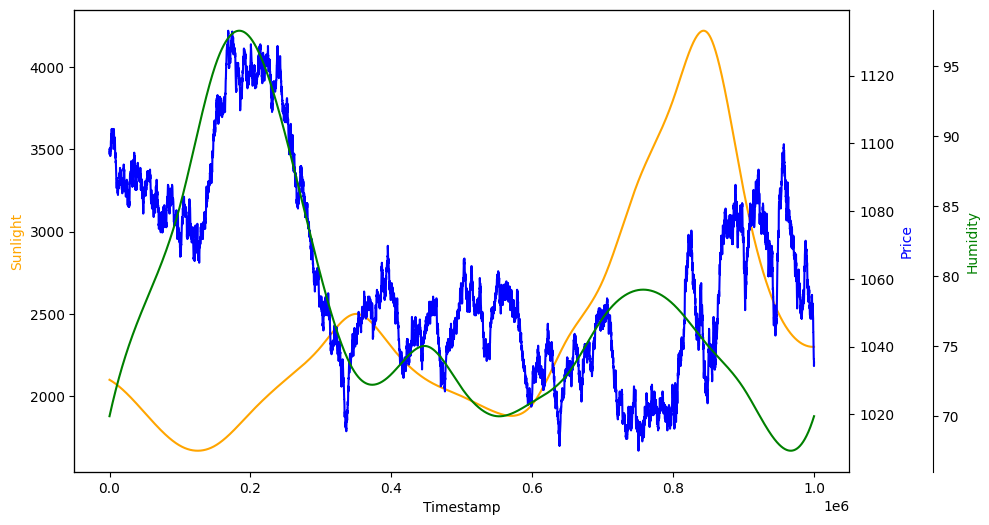

In [47]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sunlight
ax1.plot(orchid_observation['timestamp'], orchid_observation['SUNLIGHT'], color='orange')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Sunlight', color='orange')

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot price
ax2.plot(orchid_observation['timestamp'], orchid_observation['ORCHIDS'], color='blue')
ax2.set_ylabel('Price', color='blue')

# Create a third axis sharing the same x-axis
ax3 = ax1.twinx()

# Plot humidity
ax3.plot(orchid_observation['timestamp'], orchid_observation['HUMIDITY'], color='green')
ax3.set_ylabel('Humidity', color='green')

# Adjust the position of the third axis
ax3.spines['right'].set_position(('outward', 60))

# Show the plot
plt.show()
# plt.figure(figsize=(10, 6))
# # Plot orchid price
# plt.plot(orchid_observation['timestamp'], orchid_observation[ORCHIDS], color='red')
# plt.xlabel('Timestamp')
# plt.ylabel('Orchid Price', color='red')

# # Create a second axis sharing the same x-axis
# ax2 = plt.gca().twinx()

# # Plot sunlight
# ax2.plot(orchid_observation['timestamp'], orchid_observation['HUMIDITY'], color='blue')
# ax2.set_ylabel('Humidity', color='blue')

# # Show the plot
# plt.show()


(1050.0, 1120.0)

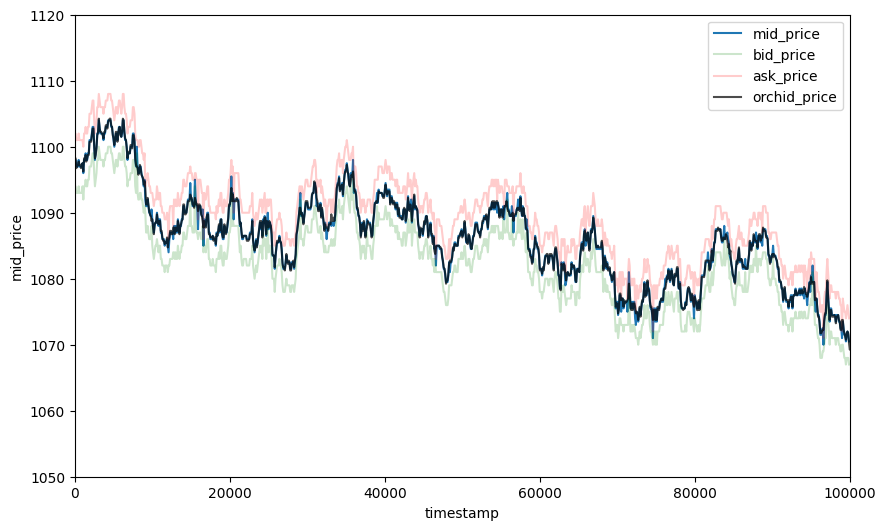

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = orchid_market, x='timestamp', y='mid_price', label = 'mid_price' )
sns.lineplot(data = orchid_market, x='timestamp', y='bid_price_1', label = 'bid_price', alpha = 0.2, color = 'green')
sns.lineplot(data = orchid_market, x='timestamp', y='ask_price_1', label = 'ask_price', alpha = 0.2 , color = 'red')
sns.lineplot(data = orchid_observation, x='timestamp', y=ORCHIDS, label = 'orchid_price', color = 'black', alpha = 0.7)
plt.xlim(0, 100000)
plt.ylim(1050, 1120)